<a href="https://colab.research.google.com/github/Umang-Gisma/M505D/blob/main/M505D_11_FEB_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**11.02.2026**

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#1
print("==========1===========")
df = pd.read_csv("/content/M505D_Data/bank_data.csv")
print("Shap of dataset: ", df.shape)

#2
print("==========2===========")
df = df.join(pd.get_dummies(df['gender']))
df.drop("gender",axis=1,inplace=True)

df = df.join(pd.get_dummies(df['country']))
df.drop("country",axis=1,inplace=True)

print('retained' in df.columns)


#3
print("==========3===========")
y = df["retained"].to_numpy()
y_org = y.astype(float)

df.drop("retained",axis=1,inplace=True)
df.drop("last_name",axis=1,inplace=True)

x_org = df.values

print(x_org.shape)
print(y_org.shape)

#4
print("==========4===========")
x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2)

print("x_train",x_train.shape)
print("x_test",x_test.shape)

#5
print("==========5===========")
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)

df_res = pd.DataFrame(x_res,columns=df.columns)
df_res["retained"] = y_res

df_res


==========1===========
Shap of dataset:  (10000, 13)
==========2===========
True
==========3===========
(10000, 14)
(10000,)
==========4===========
x_train (8000, 14)
x_test (2000, 14)
==========5===========


,id,credit_score,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,f,m,Austria,Germany,Switzerland,retained
0,-1.240439,0.971765,0.670659,-1.389570,-1.222390,2.533037,0.642207,0.962936,1.350297,1.095269,-1.095269,1.741338,-0.581392,-0.998751,0.0
1,-0.566965,-1.424911,0.480161,-1.389570,-0.203881,0.806359,-1.557131,0.962936,-0.821493,-0.913017,0.913017,-0.574271,-0.581392,1.001251,0.0
2,1.661486,0.120997,-0.472327,-1.043583,0.664129,0.806359,-1.557131,0.962936,-0.778143,-0.913017,0.913017,-0.574271,-0.581392,1.001251,1.0
3,-0.575221,0.753886,-1.043820,-0.351609,-1.222390,0.806359,0.642207,0.962936,0.418500,-0.913017,0.913017,-0.574271,-0.581392,1.001251,1.0
4,1.557049,-0.387389,-0.567576,-0.697596,1.273110,0.806359,0.642207,0.962936,-0.732369,-0.913017,0.913017,-0.574271,1.720011,-0.998751,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,0.646278,0.287001,1.884900,0.960148,1.562735,-0.920319,-1.557131,-1.038490,1.605050,-0.913017,0.913017,-0.574271,-0.581392,1.001251,0.0
12726,0.181280,0.936664,0.537259,-0.351609,1.807093,0.806359,-1.557131,-1.038490,-0.157328,-0.913017,0.913017,1.741338,-0.581392,-0.998751,0.0
12727,-0.282168,-1.181933,-0.421978,0.996094,-1.222390,-0.920319,0.642207,-1.038490,1.187700,1.095269,-1.095269,-0.574271,-0.581392,1.001251,0.0
12728,-0.319158,-1.024549,0.819791,-0.998115,0.984746,-0.920319,0.642207,-1.038490,-0.693235,1.095269,-1.095269,-0.574271,1.720011,-0.998751,0.0


In [94]:

#6
print("==========6===========")

clf = LogisticRegression(random_state=42)
clf.fit(x_res, y_res)

x_test_scaled = scaler.fit_transform(x_test)

y_pred = clf.predict(x_test_scaled)

==========6===========


In [95]:
res_df = pd.DataFrame()
res_df["y_test"] = y_test
res_df["y_pred"] = y_pred
res_df

,y_test,y_pred
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
1995,1.0,1.0
1996,1.0,0.0
1997,1.0,1.0
1998,1.0,0.0


In [96]:
confusion_matrix(y_test, y_pred)

array([[ 284,  118],
       [ 447, 1151]])

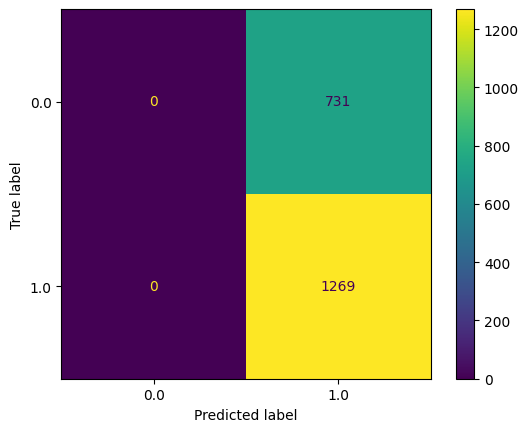

In [97]:
_ = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_pred)

In [98]:
accuracy_score(y_test, y_pred)

0.7175

In [99]:
precision_score(y_test, y_pred)

0.9070133963750985

In [100]:
recall_score(y_test, y_pred)

0.7202753441802253

In [101]:
f1_score(y_test, y_pred)

0.802929891873038